#케글 데이터 연동하기
- !pip install kaggle

In [ ]:
!pip install kaggle

In [ ]:
#케글 json upload
#케글사이트에서 각자 로그인하고 API키를 생성해 다운로드 받아서 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youngbokcho","key":"ed8a5ef7d0c7dc1a347a60d0cdfc185c"}'}

In [ ]:
# 케글 파일 만들기(mkdir)
!mkdir -p ~/.kaggle
# 복사(cp)
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록
!chmod 600 ~/.kaggle/kaggle.json

# 케글 json 파일 제대로 설치 됬는지 확인
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jul  1 10:06 kaggle.json


In [ ]:
#케글 데이터 셋을 확인하기
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           6645        138  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           5259        111  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          13138        231  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset           R

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:20<00:00, 38.6MB/s]
100% 612M/612M [00:20<00:00, 31.6MB/s]


In [ ]:
# zip 파일 풀기

!unzip /content/gtsrb-german-traffic-sign.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/

In [ ]:
#
import pandas as pd
import numpy as np

import os
import pathlib

import cv2 #영상처리에 사용하는 오픈소스 라이브러리, 컴퓨터가 사람 눈처럼 인식할 수 있게 처리
from PIL import Image # 파이썬 이미지 처리 pillow 라이브러리
from tensorflow.keras.preprocessing import image


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator #imagedatagenerater는 이미지를 학습시킬 때 학습 데이터의 양이 적을 경우 학습데이터를 조금씩 변형 시켜서 학습데이터의 양을 늘리는 방식중 하나
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')#그래프 스타일 지정

In [ ]:
#난수 랜덤성 고정
np.random.seed(42)

%matplotlib inline

In [ ]:
# 코렙은 좌측 파일 아이콘 클릭해서 마운팅된 파일 하나를 오른쪽 마우스 클릭하면 경로 카피할 수 있음
data_dir = pathlib.Path('/content/Meta')
train_path = pathlib.Path('/content/Train')
test_path = pathlib.Path('/content/Test')

In [ ]:
# 전처리: 이미지 별로 사이즈가 다르기 때문에 이미지의 폭과 높이를 같은 크기로 통일
IMG_HEGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
# 카테고리 수 확인
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

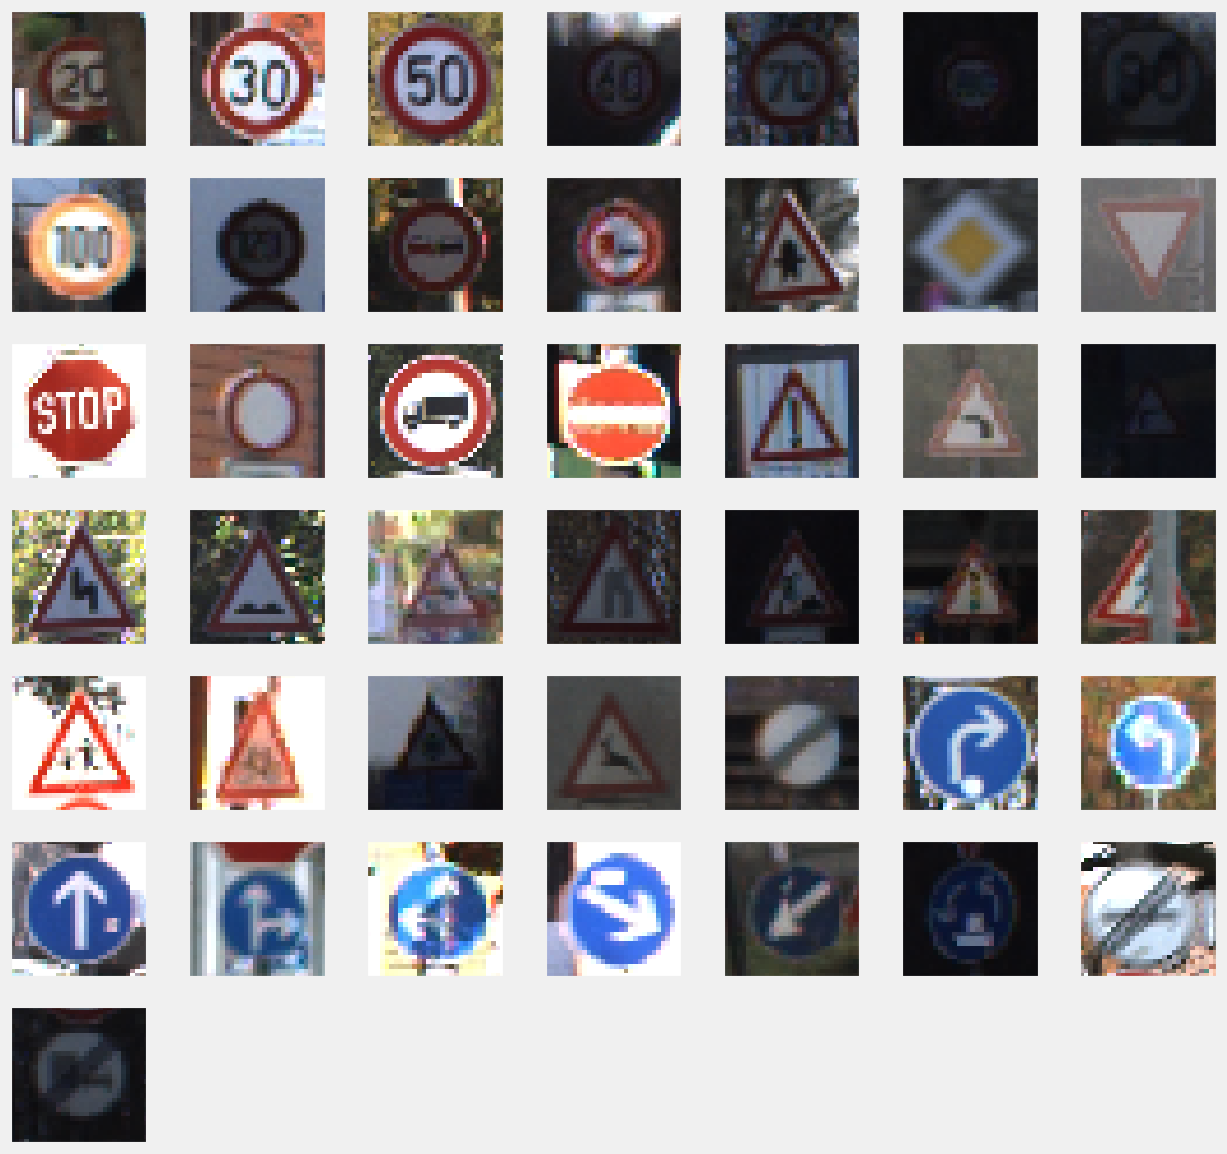

In [ ]:
# 모든 교통표시판 시각화
# pathlib모듈을 사용하면, 파일, 디렉토리(폴더)의 경로를 객체로써 조작하거나 처리할 수 있다

img_dir = pathlib.Path('/content/train')
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([]) #눈금 설정 없음
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0] #glob모듈의 glob함수는 사용자가 제시한 조건에 맞는 파일명을 리스트형식으로 반환 #*(아스터리스크)는 임의 길이의 모든 문자열을 의미
    img = load_img(sign, target_size=(30, 30))
    plt.imshow(img)
plt.show()

In [ ]:
# Label
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
#os.listdir() 매써드는 지정한 디렉토리 내의 모든 파일과 디렉토리 리스트(list)를 리턴
folders = os.listdir('/content/train')

In [ ]:
train_num = []
class_num = []

for folder in folders:
  train_files = os.listdir(str(train_path) + '/'+ folder) #리스트로 가져오면 에러떠서 str로 변환해줌
  train_num.append(len(train_files))
  class_num.append(classes[int(folder)])

In [ ]:
# 각각의 클래스의 이미지의 수에 기초해 데이터셋 분류하기
zipped_lists =  zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples =  zip(*sorted_pairs) # sorted(정렬할 데이터), 새로운 정렬된 리스트로 만들어서 반환
train_num, class_num = [ list(tuple) for tuple in tuples]

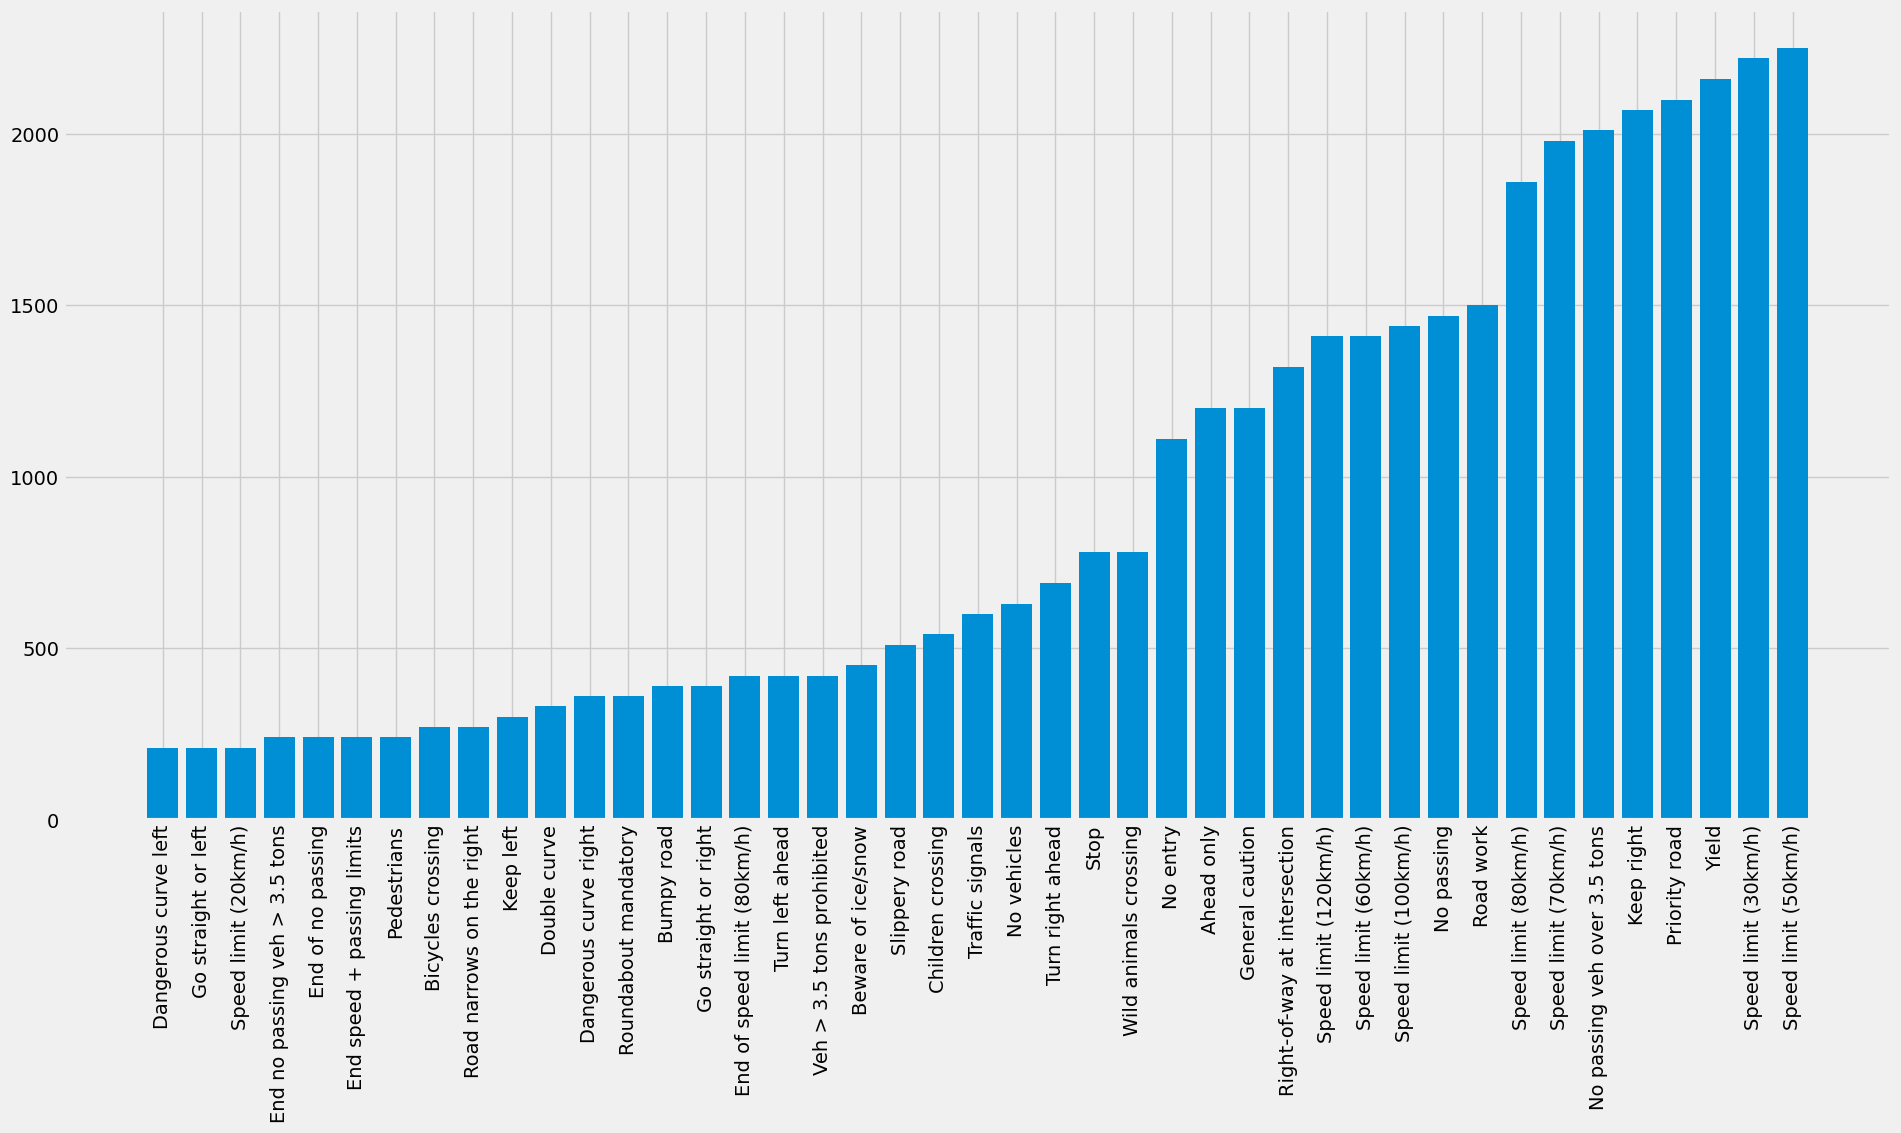

In [ ]:
# 시각화
plt.figure(figsize = (21, 10))
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img) # 이미지를 넘파이 배열로 변환
            images.append(image)
            labels.append(category)

    return images, labels

images, labels = load_data(train_path)


In [ ]:
# labels에 원핫 인코딩 진행
labels = to_categorical(labels)

# 트레인, 테스트 셋 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [ ]:
model = Sequential()

# 첫번째 Convolutional Layer : 입력 데이터로부터 특징을 추출
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 두번째 Convolutional Layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # 인풋데이터의 25%를 무작위로 0으로 만듦

# 세번째 Convolutional Layer
# 특징을 추출하는 기능을 하는 필터, 비선형 값으로 바꿔주는 activation 함수->relu
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# 모델 컴파일 하기
model.compile(
    loss='categorical_crossentropy', # 다중분류의 로스 함수
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# 모델 핏하기
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs=30,
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 8s 48ms/step - loss: 6.2211 - accuracy: 0.0372 - val_loss: 3.5325 - val_accuracy: 0.0935
Epoch 2/30
60/60 [==============================] - 2s 28ms/step - loss: 3.3046 - accuracy: 0.1519 - val_loss: 2.8587 - val_accuracy: 0.3038
Epoch 3/30
60/60 [==============================] - 2s 27ms/step - loss: 2.4644 - accuracy: 0.3765 - val_loss: 1.8722 - val_accuracy: 0.5439
Epoch 4/30
60/60 [==============================] - 2s 27ms/step - loss: 1.7593 - accuracy: 0.5418 - val_loss: 1.2644 - val_accuracy: 0.6978
Epoch 5/30
60/60 [==============================] - 2s 27ms/step - loss: 1.1908 - accuracy: 0.6752 - val_loss: 0.7586 - val_accuracy: 0.8198
Epoch 6/30
60/60 [==============================] - 2s 27ms/step - loss: 0.8051 - accuracy: 0.7683 - val_loss: 0.5352 - val_accuracy: 0.8710
Epoch 7/30
60/60 [==============================] - 2s 28ms/step - loss: 0.6173 - accuracy: 0.8189 - val_loss: 0.4016 - val_accuracy: 0.9009
Epoch 8/30
60

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9846
test set accuracy:  98.46340417861938


In [ ]:
#테스트 데이터 정확도
Y_test = pd.read_csv('/content/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

a =  pathlib.Path('/content/')

output = list()
for img in test_images:
    image = load_img(os.path.join(a, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
y_prob = model.predict(X_test)
pred = y_prob.argmax(axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  93.61836896278702


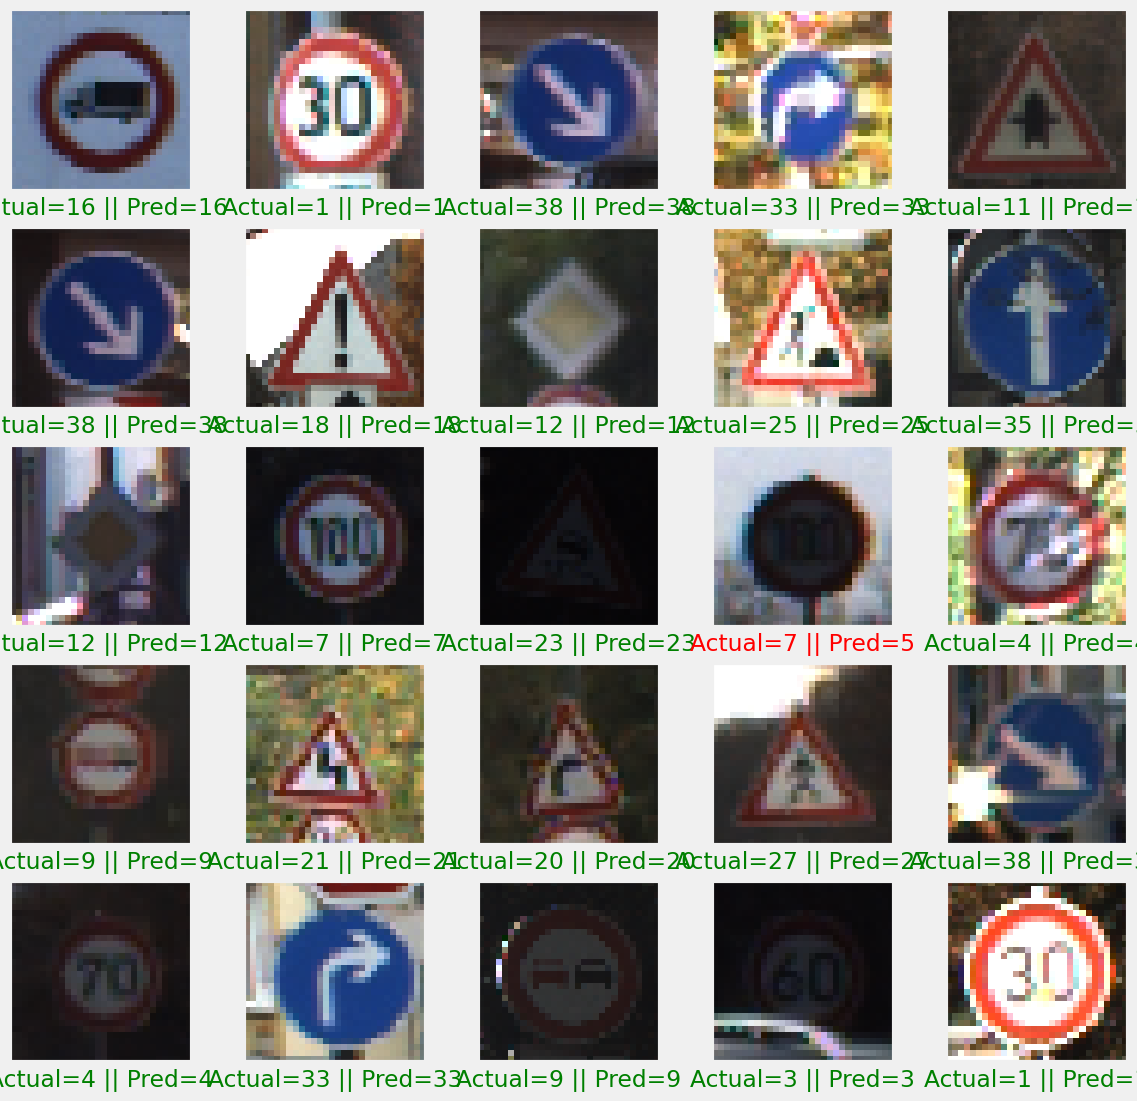

In [ ]:
#분류모델 정확도
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

#모델 성능평가
- svm / Randomforest / CNN